Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve


Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:lme4’:

    lmList


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.

── Attac

[1] 373487     61


CKD controls          CKD 
      349669         6108 


CKD controls  CKD extreme 
      349669          984 


 normo  micro 
348496  14070 


 normo  macro 
348496   1120 


    no    yes 
356332    447 


    no    yes 
345597   1469 


    no    yes 
332345  15439 


    no    yes 
356332    447 


macro  ESKD 
  963   447 


  albu   ESKD 
346560    447 


DNCKD Control         DNCKD 
       326513           645 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
    1.74     5.76     9.17    26.05    17.71 10154.49   261777 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  2.895  83.227  92.930  90.985  99.989 217.806   16726 

[1] "UACR, Distribution before Transformation"


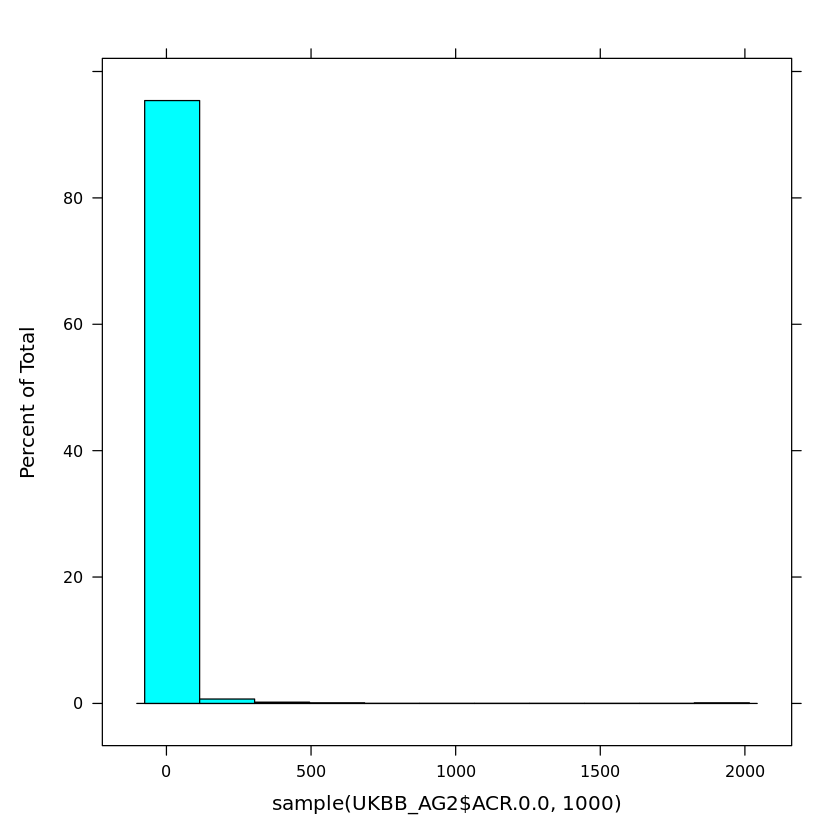

[1] "Inverse Normal Transformation, ACR"


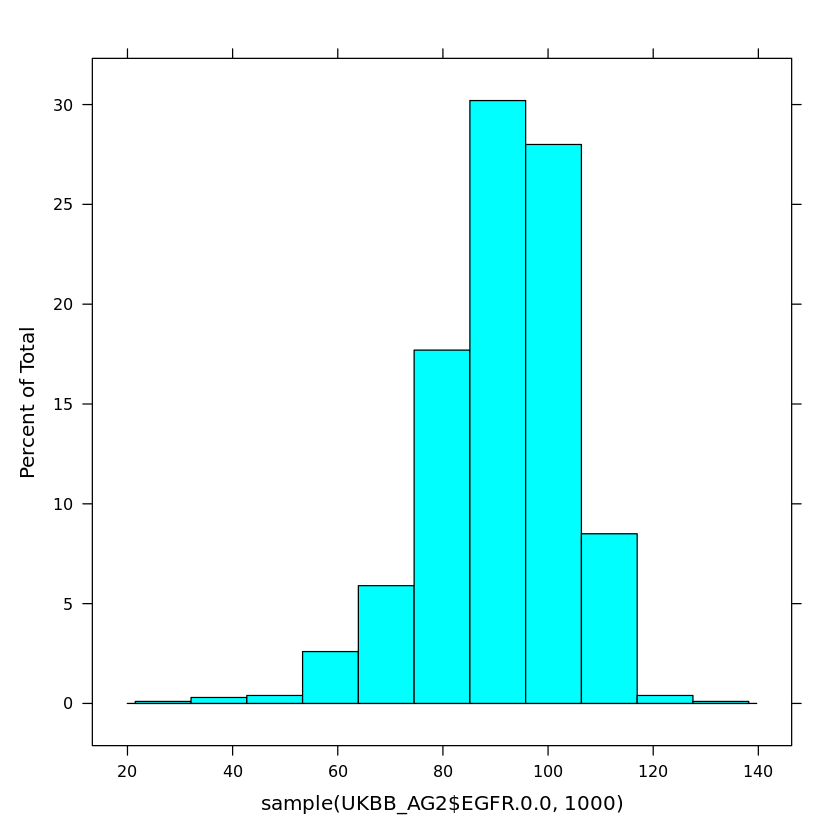

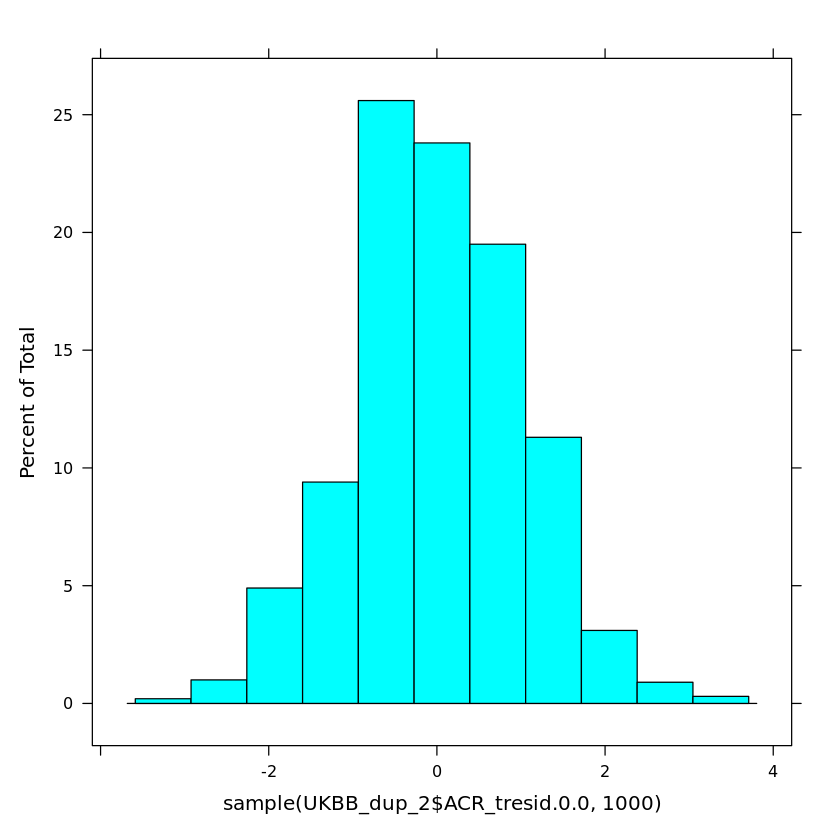

[1] 373487     68

[1] 373487     70

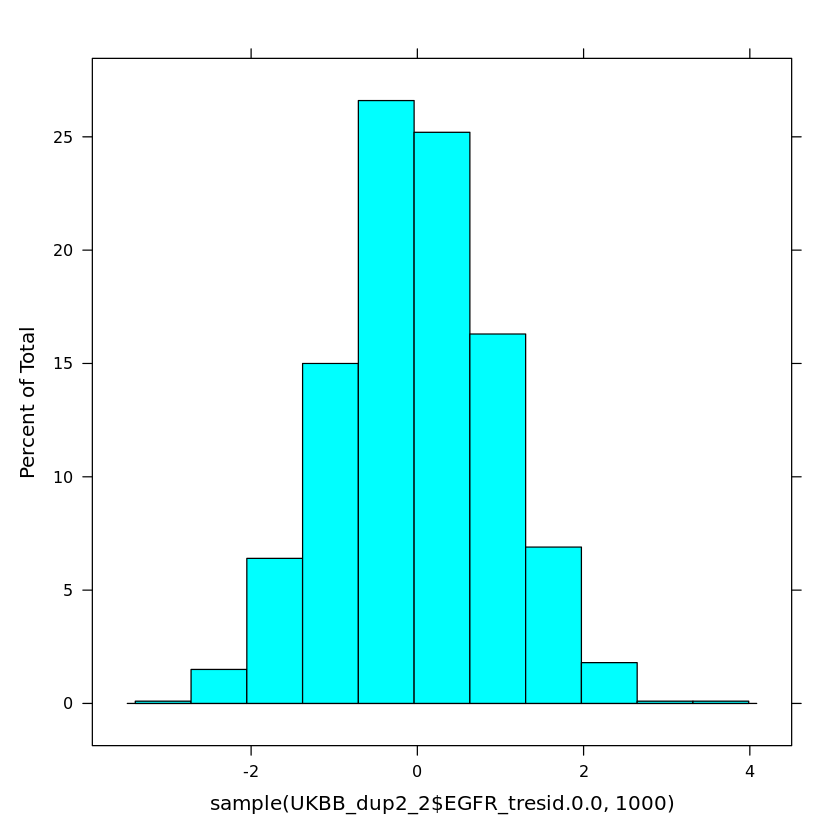

In [1]:
#Case and Control Counts

#Import libraries
library(ggpubr)
library(dplyr)
library(lme4)
library(ggplot2)
library(rms)
library(mgcv)
library(tidymv)
library("ggthemes")
library(broom)
#library(erer)
library(stringr)
library(tidyverse)
library(stringr)
library(R.utils)
library(data.table)
library(ggsci)
library(broom)
library(mgcv)
library(mgcViz)

#Restricted analysis (only)

#Read the complete set (no imputation)
UKBB_AG2_m <- fread("~/jupyter/UKBB_AG2_12Jan21.txt", header = TRUE, na.strings=c("",".","NA")) %>% select(f.eid,T2D_status,ALBUMINERIA.0.0,
                                 ESKD.0.0,CKD.0.0,DN.0.0,ALL.0.0,NONESKD.0.0,DNCKD.0.0,
                                 CTRL_DNCKD.0.0,ACR.0.0,EGFR.0.0,URN_ALBUMIN_FLAG.0.0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,SEX.0.0,
                                 IDEAL_DIET2.0.0,LIFESCORE,AGE.0.0, SES_TDI.0.0,BMI.0.0,EDUYEARS,SBP.0.0,HYP_POS1,STATIN,
                                 WHR.0.0,GRS_WT_IR,GRS_WT_T2DIR,T2D.0.0,
                                 GRS_WT_LIRd2,GRS_WT_LIRt,GRS_WT_LIRq,GRS_WT_LIRf3,GRS_WT_IRd2,
                                 GRS_WT_IRt,GRS_WT_IRq,GRS_WT_IRf3,GRS_WT_IR53d2,GRS_WT_IR53t,
                                 GRS_WT_IR53q,GRS_WT_IR53f3,GRS_WT_T2DIRd2,GRS_WT_T2DIRt,
                                 GRS_WT_T2DIRq,GRS_WT_T2DIRf3,GRS_WT_L5E8IRd2,GRS_WT_L5E8IRt,
                                 GRS_WT_L5E8IRq,GRS_WT_L5E8IRf3,GRS_WT_L1E5IRd2,GRS_WT_L1E5IRt,
                                 GRS_WT_L1E5IRq,GRS_WT_L1E5IRf3)
UKBB_AG2=as.data.frame(UKBB_AG2_m)
dim(UKBB_AG2)
rm(UKBB_AG2_m)

#Dichotomize Outcomes for Logistic Regression

#1_CKD
UKBB_AG2$CKD_only.0.0 <- factor(ifelse(UKBB_AG2$CKD.0.0=="CKD controls","CKD controls",
                              ifelse(UKBB_AG2$CKD.0.0=="CKD","CKD",NA)),
                levels = c("CKD controls", "CKD"))
#Set the refernece
UKBB_AG2$CKD_only.0.0 <- relevel(UKBB_AG2$CKD_only.0.0, ref = "CKD controls")

#2_CKD Extreme
UKBB_AG2$CKD_ex.0.0 <- factor(ifelse(UKBB_AG2$CKD.0.0=="CKD controls","CKD controls",
                              ifelse(UKBB_AG2$CKD.0.0=="CKD extreme","CKD extreme",NA)),
                levels = c("CKD controls", "CKD extreme"))
#Set the refernece
UKBB_AG2$CKD_ex.0.0 <- relevel(UKBB_AG2$CKD_ex.0.0, ref = "CKD controls")

#3_Micro
UKBB_AG2$micro.0.0 <- factor(ifelse(UKBB_AG2$ALBUMINERIA.0.0=="micro","micro",
                              ifelse(UKBB_AG2$ALBUMINERIA.0.0=="normo","normo",NA)),
                levels = c("normo", "micro"))
#Set the reference
UKBB_AG2$micro.0.0 <- relevel(UKBB_AG2$micro.0.0, ref = "normo")

#4_Macro
UKBB_AG2$macro.0.0 <- factor(ifelse(UKBB_AG2$ALBUMINERIA.0.0=="macro","macro",
                              ifelse(UKBB_AG2$ALBUMINERIA.0.0=="normo","normo",NA)),
                levels = c("normo", "macro"))
#Set the reference
UKBB_AG2$macro.0.0 <- relevel(UKBB_AG2$macro.0.0, ref = "normo")

#5_Macro
UKBB_AG2$macro.0.0 <- factor(ifelse(UKBB_AG2$ALBUMINERIA.0.0=="macro","macro",
                              ifelse(UKBB_AG2$ALBUMINERIA.0.0=="normo","normo",NA)),
                levels = c("normo", "macro"))

#6_ESKD vs. Macro
UKBB_AG2$ESKD_macro.0.0 <- factor(ifelse(UKBB_AG2$ESKD.0.0=="yes","ESKD",
                              ifelse(UKBB_AG2$ALBUMINERIA.0.0=="macro","macro",NA)),
                levels = c("macro","ESKD"))

#7_DNCKD vs. Control DNCKD
UKBB_AG2$DNCKD2.0.0 <- factor(ifelse(UKBB_AG2$DNCKD.0.0=="yes","DNCKD",
                              ifelse(UKBB_AG2$CTRL_DNCKD.0.0=="yes","DNCKD Control",NA)),
                levels = c("DNCKD Control","DNCKD"))

#8_ESKD vs. Normo, Macro, Micro
UKBB_AG2$ESKD_Albu.0.0 <- factor(ifelse(UKBB_AG2$ESKD.0.0=="yes","ESKD",
                              ifelse(UKBB_AG2$ALBUMINERIA.0.0 %in% c("normo","macro","micro"),"albu",NA)),
                levels = c("albu","ESKD"))

#Set the reference
UKBB_AG2$macro.0.0 <- relevel(UKBB_AG2$macro.0.0, ref = "normo")

#Summarize Counts of Disease Outcomes
table(UKBB_AG2$CKD_only.0.0) #1
table(UKBB_AG2$CKD_ex.0.0) #2
table(UKBB_AG2$micro.0.0) #3
table(UKBB_AG2$macro.0.0) #4
table(UKBB_AG2$ESKD.0.0) #5
table(UKBB_AG2$DN.0.0) #6
table(UKBB_AG2$ALL.0.0) #7
table(UKBB_AG2$ESKD.0.0) #8
table(UKBB_AG2$ESKD_macro.0.0) #8
table(UKBB_AG2$ESKD_Albu.0.0) #9
table(UKBB_AG2$DNCKD2.0.0) #10

UKBB_AG2$GRS_WT_IRf3 <- factor(UKBB_AG2$GRS_WT_IRf3)
UKBB_AG2$GRS_WT_IRf3 <- relevel(UKBB_AG2$GRS_WT_IRf3,'low risk')
UKBB_AG2$GRS_WT_T2DIRf3 <- factor(UKBB_AG2$GRS_WT_T2DIRf3)
UKBB_AG2$GRS_WT_T2DIRf3 <- relevel(UKBB_AG2$GRS_WT_T2DIRf3,'low risk')
summary(UKBB_AG2$ACR.0.0)
summary(UKBB_AG2$EGFR.0.0)

#ACR - replace undetected with the lowest limit of detection
UKBB_AG2$ACR.0.0 <- ifelse(is.na(UKBB_AG2$ACR.0.0) & UKBB_AG2$URN_ALBUMIN_FLAG.0.0=='<6.7',6.7,UKBB_AG2$ACR.0.0)
print('UACR, Distribution before Transformation')
histogram(sample(UKBB_AG2$ACR.0.0,1000))
histogram(sample(UKBB_AG2$EGFR.0.0,1000))
#Inverse normal transformed age-adjusted, sex-adjusted residuals of log-transformed UACR
#complete cases
UKBB_dup <- UKBB_AG2 %>% select(f.eid,ACR.0.0,AGE.0.0,SEX.0.0)
UKBB_dup <- UKBB_dup[complete.cases(UKBB_dup),]
rx.out <- lm(ACR.0.0~AGE.0.0 + SEX.0.0, data=UKBB_dup)
#duplicate cases
UKBB_dup2 <- UKBB_AG2 %>% select(f.eid,EGFR.0.0,AGE.0.0,SEX.0.0)
UKBB_dup2 <- UKBB_dup2[complete.cases(UKBB_dup2),]
rx.out2 <- lm(EGFR.0.0~AGE.0.0 + SEX.0.0, data=UKBB_dup2)
# generating file with residuals (ACR)
residx <- as.data.frame(residuals(rx.out))
trans_resid <- as.data.frame(qnorm((rank(residx,na.last="keep")-0.5)/sum(!is.na(residx))))
names(trans_resid) <- 'ACR_tresid.0.0'
UKBB_dup_2 <- cbind(UKBB_dup, trans_resid)
#generating file with residuals (eGFR)
residx2 <- as.data.frame(residuals(rx.out2))
trans_resid2 <- as.data.frame(qnorm((rank(residx2,na.last="keep")-0.5)/sum(!is.na(residx2))))
names(trans_resid2) <- 'EGFR_tresid.0.0'
UKBB_dup2_2 <- cbind(UKBB_dup2, trans_resid2)
#drop additional covariates
UKBB_dup_2 <- subset(UKBB_dup_2, select = c(f.eid,ACR_tresid.0.0))
print('Inverse Normal Transformation, ACR')
histogram(sample(UKBB_dup_2$ACR_tresid.0.0,1000))
UKBB_dup2_2 <- subset(UKBB_dup2_2, select = c(f.eid,EGFR_tresid.0.0))
histogram(sample(UKBB_dup2_2$EGFR_tresid.0.0,1000))
#merge transformed residuals back
dim(UKBB_AG2)
UKBB_AG2 <- left_join(UKBB_AG2,UKBB_dup_2,by='f.eid')
UKBB_AG2 <- left_join(UKBB_AG2,UKBB_dup2_2,by='f.eid')
dim(UKBB_AG2)
#T2D-stratified samples
T2D <- UKBB_AG2 %>% filter(T2D_status==1)
ND <- UKBB_AG2 %>% filter(T2D_status==0)
#remove extra datasets
rm(UKBB_dup)
rm(UKBB_dup2)
rm(UKBB_dup_2)
rm(UKBB_dup2_2)


In [12]:
casecounts <- function(data,outcome) {
    data_dup <- data %>% select(GRS_WT_IRf3 , AGE.0.0 , SEX.0.0 , 
        PC1 , PC2 , PC3 , PC4 , PC5 , PC6 , PC7 , PC8 , PC9 , PC10 , 
        EDUYEARS , SES_TDI.0.0 , BMI.0.0 , HYP_POS1 , STATIN,outcome)
    dim <- dim(data_dup[complete.cases(data_dup),])
    print(outcome)
    return(dim)    
}

print('T2D')
casecounts(T2D,'EGFR_tresid.0.0')
casecounts(T2D,'ACR_tresid.0.0')
print('ND')
casecounts(ND,'EGFR_tresid.0.0')
casecounts(ND,'ACR_tresid.0.0')
print('UKBB_AG2')
casecounts(UKBB_AG2,'ACR_tresid.0.0')
casecounts(UKBB_AG2,'EGFR_tresid.0.0')

[1] "T2D"
[1] "EGFR_tresid.0.0"


[1] 19912    19

[1] "ACR_tresid.0.0"


[1] 20148    19

[1] "ND"
[1] "EGFR_tresid.0.0"


[1] 332320     19

[1] "ACR_tresid.0.0"


[1] 339002     19

[1] "UKBB_AG2"
[1] "ACR_tresid.0.0"


[1] 359150     19

[1] "EGFR_tresid.0.0"


[1] 352232     19

In [13]:
casecounts <- function(data,outcome) {
    data_dup <- data %>% select(GRS_WT_IRf3 , AGE.0.0 , SEX.0.0 , 
        PC1 , PC2 , PC3 , PC4 , PC5 , PC6 , PC7 , PC8 , PC9 , PC10 , outcome)
    dim <- dim(data_dup[complete.cases(data_dup),])
    print(outcome)
    return(dim)    
}

print('T2D')
casecounts(T2D,'EGFR_tresid.0.0')
casecounts(T2D,'ACR_tresid.0.0')
print('ND')
casecounts(ND,'EGFR_tresid.0.0')
casecounts(ND,'ACR_tresid.0.0')
print('UKBB_AG2')
casecounts(UKBB_AG2,'ACR_tresid.0.0')
casecounts(UKBB_AG2,'EGFR_tresid.0.0')

[1] "T2D"
[1] "EGFR_tresid.0.0"


[1] 20332    14

[1] "ACR_tresid.0.0"


[1] 20553    14

[1] "ND"
[1] "EGFR_tresid.0.0"


[1] 336429     14

[1] "ACR_tresid.0.0"


[1] 343132     14

[1] "UKBB_AG2"
[1] "ACR_tresid.0.0"


[1] 363685     14

[1] "EGFR_tresid.0.0"


[1] 356761     14